In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

first we load the train and test data

In [2]:
#train data
df1=pd.read_csv('E:/train_loan.csv')
#test data
df2=pd.read_csv('E:/test_loan.csv')

# EDA
We need to do separate EDA for both test and train

# 1)fixing df1 data

In [3]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

C:\Users\GOPINATH V GOWDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

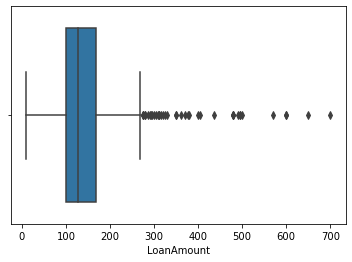

In [14]:
sns.boxplot(df1.LoanAmount)

C:\Users\GOPINATH V GOWDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Amount_Term'>

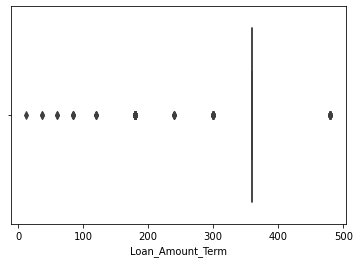

In [15]:
sns.boxplot(df1.Loan_Amount_Term)

In [20]:
df1['Credit_History'].unique()

array([ 1.,  0., nan])

In [21]:
df1['Gender'].fillna(df1['Gender'].mode()[0] , inplace=True)
df1['Married'].fillna(df1['Married'].mode()[0] , inplace=True)
df1['Dependents'].fillna(df1['Dependents'].mode()[0] , inplace=True)
df1['LoanAmount'].fillna(df1['LoanAmount'].median() , inplace=True)
df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].median() , inplace=True)
df1['Credit_History'].fillna(df1['Credit_History'].mode()[0] , inplace=True)

In [23]:
df1.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
df1.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [24]:
df1['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [25]:
df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0] , inplace=True)

In [27]:
df1.shape

(614, 13)

# now we fixed the df1 data without any miss
we need to convert categorical into numerical 

In [31]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
df1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [34]:
#we use label encoder to convert categorical into int
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [36]:
# code for lable encoder
df1['Property_Area']=labelencoder.fit_transform(df1['Property_Area'])
df1['Loan_Status']=labelencoder.fit_transform(df1['Loan_Status'])
df1['Self_Employed']=labelencoder.fit_transform(df1['Self_Employed'])
df1['Education']=labelencoder.fit_transform(df1['Education'])
df1['Married']=labelencoder.fit_transform(df1['Married'])
df1['Gender']=labelencoder.fit_transform(df1['Gender'])
df1['Dependents']=labelencoder.fit_transform(df1['Dependents'])

In [39]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [42]:
df1.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

# 1)fixing df2 data

In [43]:
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [44]:
df2.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [45]:
df2['Gender'].fillna(df2['Gender'].mode()[0] , inplace=True)
df2['Dependents'].fillna(df2['Dependents'].mode()[0] , inplace=True)
df2['Self_Employed'].fillna(df2['Self_Employed'].mode()[0] , inplace=True)
df2['LoanAmount'].fillna(df2['LoanAmount'].median() , inplace=True)
df2['Loan_Amount_Term'].fillna(df2['Loan_Amount_Term'].median() , inplace=True)
df2['Credit_History'].fillna(df2['Credit_History'].mode()[0] , inplace=True)

In [46]:
df2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [47]:
df2.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [48]:
#convert categorical into numerical

In [50]:
# code for lable encoder
df2['Property_Area']=labelencoder.fit_transform(df2['Property_Area'])
df2['Self_Employed']=labelencoder.fit_transform(df2['Self_Employed'])
df2['Education']=labelencoder.fit_transform(df2['Education'])
df2['Married']=labelencoder.fit_transform(df2['Married'])
df2['Gender']=labelencoder.fit_transform(df2['Gender'])
df2['Dependents']=labelencoder.fit_transform(df2['Dependents'])

In [52]:
df2.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
5,LP001054,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2
6,LP001055,0,0,1,1,0,2226,0,59.0,360.0,1.0,1
7,LP001056,1,1,2,1,0,3881,0,147.0,360.0,0.0,0
8,LP001059,1,1,2,0,0,13633,0,280.0,240.0,1.0,2
9,LP001067,1,0,0,1,0,2400,2400,123.0,360.0,1.0,1


# Separate Dependent and Independent Variables

In [53]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [81]:
X_train=df1.iloc[:,1:-1]

In [82]:
y_train=df1['Loan_Status']

In [83]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [62]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [91]:
X_train.shape

(614, 11)

In [68]:
#before proceed with ML model will visualize te data

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

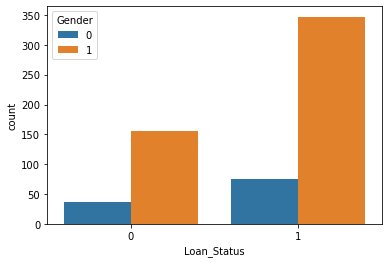

In [70]:
sns.countplot(data=df1, x='Loan_Status', hue='Gender')

In [71]:
#above one we can see male paid more than female

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

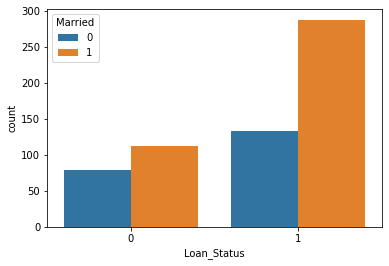

In [77]:
sns.countplot(data=df1, x='Loan_Status', hue='Married')

In [73]:
#also married people paid loan without miss

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

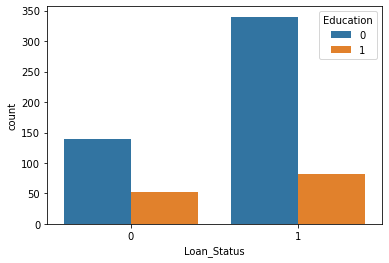

In [76]:
sns.countplot(data=df1, x='Loan_Status', hue='Education')

# Now we will train the model on the training dataset and make predictions for the test dataset. But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts: train and validation. We can train the model on this training part and using that make predictions for the validation part. In this way, we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

In [93]:
#will divide train data into train and test data
X=df1.iloc[:,1:-1]
y=df1['Loan_Status']

In [94]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [95]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [96]:
#split the data

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=14)

In [100]:
X_train.shape, X_test.shape

((429, 11), (185, 11))

Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Let’s predict the Loan_Status for validation set and calculate its accuracy

In [102]:
pred_test = model.predict(X_test)
accuracy_score(y_test,pred_test)

0.827027027027027

So our predictions are almost 80% accurate, i.e. we have identified 80% of the loan status correctly.

# Let’s make predictions for the test dataset.

In [110]:
pred_test = model.predict([[1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0]])

In [112]:
pred_test

array([1])

# Let's import the submission file which we have to submit on the solution checker.

In [113]:
subm=pd.read_csv('E:/sample_submission.csv')

In [114]:
subm

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


We only need the Loan_ID and the corresponding Loan_Status for the final submission. we will fill these columns with the Loan_ID of the test dataset and the predictions that we made, i.e., pred_test respectively.

In [120]:
subm['Loan_Status'].replace(0, 'N', inplace=True)
subm['Loan_Status'].replace(1, 'Y', inplace=True)

In [124]:
subm['Loan_Status']=pred_test[[]]
subm['Loan_ID']=y_test(['Loan_ID'])

ValueError: Length of values (0) does not match length of index (367)